In [3]:
import os
os.getcwd()

'C:\\Users\\HP'

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
os.chdir('C:/Users/HP/Desktop/Datasets')
os.getcwd()

'C:\\Users\\HP\\Desktop\\Datasets'

In [5]:
df = pd.read_csv('challenger.csv')
print(df.head())

   o_ring_ct  O.ring.failures  temperature  pressure  launch_id
0          6                0           66        50          1
1          6                1           70        50          2
2          6                0           69        50          3
3          6                0           68        50          4
4          6                0           67        50          5


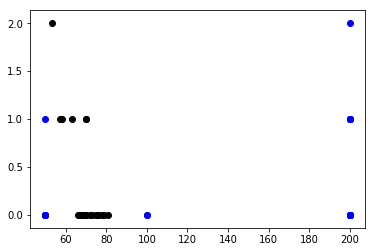

                 o_ring_ct  O.ring.failures  temperature  pressure  launch_id
o_ring_ct              NaN              NaN          NaN       NaN        NaN
O.ring.failures        NaN         1.000000    -0.725671  0.220326  -0.011993
temperature            NaN        -0.725671     1.000000  0.039818   0.230770
pressure               NaN         0.220326     0.039818  1.000000   0.839932
launch_id              NaN        -0.011993     0.230770  0.839932   1.000000


In [6]:
plt.scatter(df['pressure'],df['O.ring.failures'],color = 'b',marker = 'o')
plt.scatter(df['temperature'],df['O.ring.failures'],color = 'k',marker = 'o')
plt.show()
df.describe()
print(df.corr())

In [7]:
import statsmodels.api as sm
model = sm.OLS(df['O.ring.failures'],df['pressure']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     8.278
Date:                Tue, 04 Jun 2019   Prob (F-statistic):            0.00875
Time:                        14:22:02   Log-Likelihood:                -18.173
No. Observations:                  23   AIC:                             38.35
Df Residuals:                      22   BIC:                             39.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pressure       0.0020      0.001      2.877      0.009       0.001       0.003
==============================================================================
Omnibus:                       11.553   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.660
Skew:                           1.447   Prob(JB):                      0.00799
Kurtosis:                       4.306   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

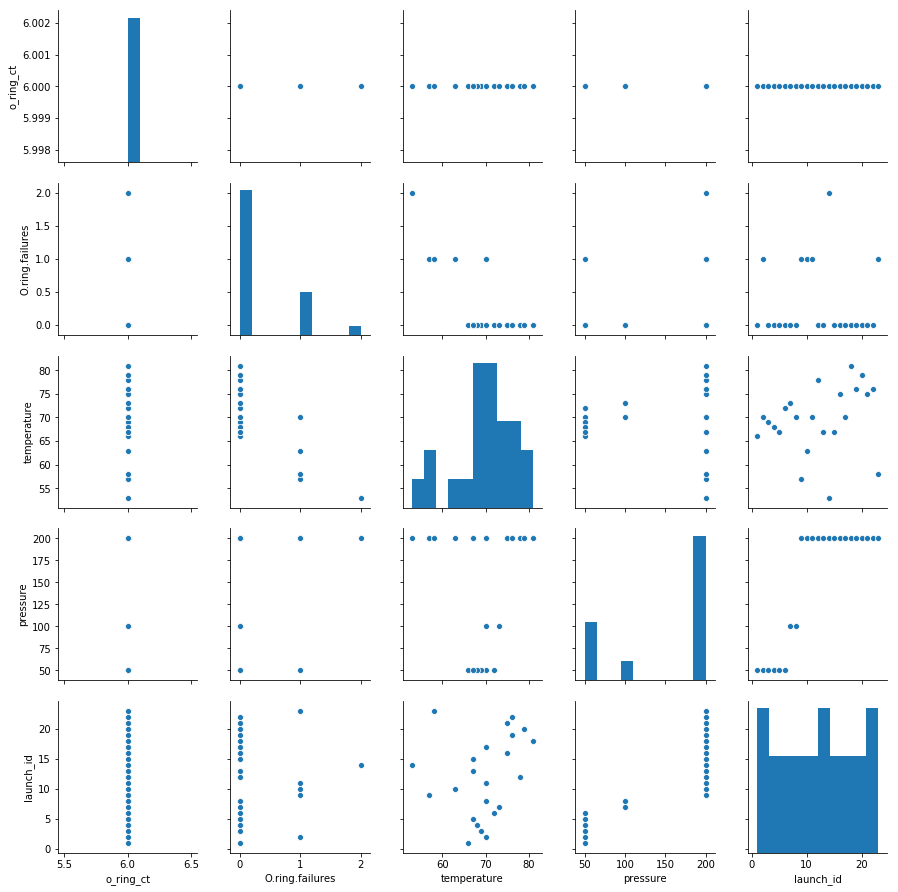

In [8]:
import seaborn as sns
sns.pairplot(df)

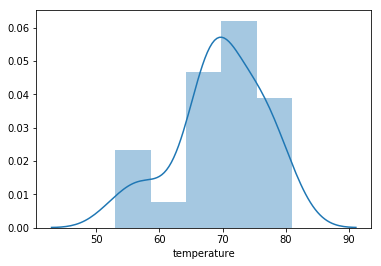

In [9]:
sns.distplot(df['temperature'])

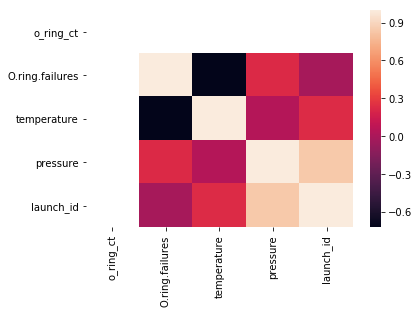

In [10]:
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

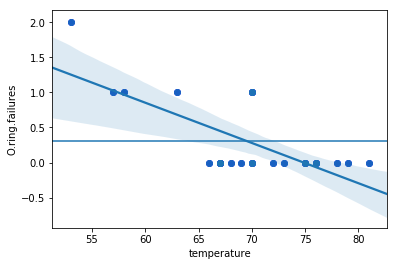

In [11]:
plt.scatter(df['temperature'],df['O.ring.failures'],color = 'b',marker = 'o')
plt.xlabel('temperature')
plt.ylabel('O_ring_failures')
plt.axhline(df['O.ring.failures'].mean())
#plt.show()
sns.regplot(x='temperature',y='O.ring.failures',data = df)

In [12]:
X = df['temperature'].values
y = df['O.ring.failures'].values
#X.reshape((-1,1))

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2,random_state = 1)
X_train = X_train.reshape(-1,1)

intercept: 3.643754909662214 slope: [-0.04870385]


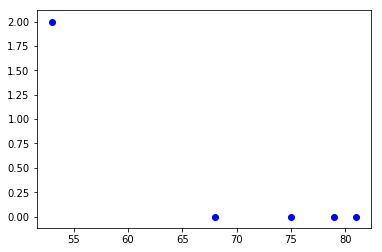

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
results = model.fit(X_train,y_train)
model.score(X_train,y_train)
print('intercept:',model.intercept_,'slope:',model.coef_)
X_test = X_test.reshape((-1,1))
y_pred = model.predict(X_test)
plt.scatter(X_test,y_test,color = 'b',marker = 'o')
#plt.scatter(X_test,y_pred,color = 'k',marker = 'o')
plt.show()

In [18]:
X_new = [[30]]
y_new = model.predict(X_new)
print(y_new)

[2.18263943]


In [19]:
from sklearn.metrics import mean_squared_error,r2_score

X_train = X_train.reshape(-1,1)
y_train_pred = model.predict(X_train)

X_test = X_test.reshape(-1,1)
y_test_pred = model.predict(X_test)
#A Good model is one that has high accuracy on both training and testing data

In [24]:
#for a good model rmse must be low and r2 value must be high

rmse_training = (np.sqrt(mean_squared_error(y_train,y_train_pred)))
r2_training =r2_score(y_train,y_train_pred)

rmse_testing = (np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2_testing = r2_score(y_test,y_test_pred)
print('RMSE is {}'.format(r2_training))

RMSE is 0.37164783370596444


In [25]:
print('RMSE_testing is {}'.format(r2_testing))

RMSE_testing is 0.6495177558531813


In [ ]:
#rmse increases because of biased data and noisy data
#r2_score is variance biased tradeoff

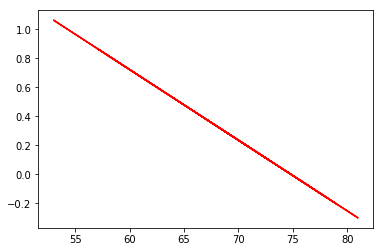

In [27]:
X = X.reshape(-1,1)
y_pred = model.predict(X)
plt.plot(X,y_pred,color = 'r')
plt.show()

In [28]:
import statsmodels.api as sm
X = df[['temperature','pressure']]
y = df['O.ring.failures']
model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.333
Date:                Tue, 04 Jun 2019   Prob (F-statistic):             0.0266
Time:                        15:26:03   Log-Likelihood:                -17.873
No. Observations:                  23   AIC:                             39.75
Df Residuals:                      21   BIC:                             42.02
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    -0.0030      0.004     -0.745      0.465      -0.011       0.005
pressure        0.0031      0.002      1.842      0.080      -0.000       0.007
==============================================================================
Omnibus:                        8.717   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.616
Skew:                           1.239   Prob(JB):                       0.0366
Kurtosis:                       3.871   Cond. No.                         6.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""